In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA([b for (i, b) in enumerate(lepping_db.all()) if i % 12 == 0], mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

07/31/2019 12:35:06 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
07/31/2019 12:35:08 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
07/31/2019 12:35:10 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control02/func/sub-control02_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
07/31/2019 12:35:12 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control

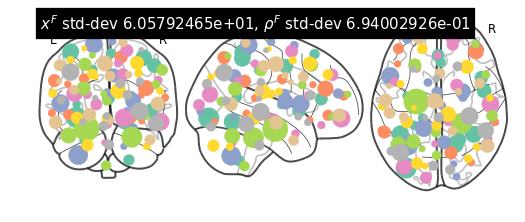

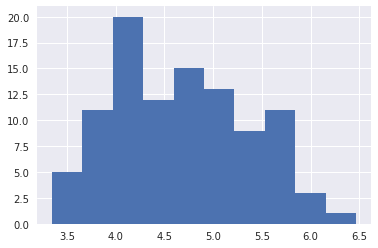

(<nilearn.plotting.displays.OrthoProjector at 0x7fb893036630>,
 tensor([[-33.5699, -83.4866,  -8.2726],
         [ 45.5369,  11.5600,  -0.4628],
         [  0.1149,  34.8882,  11.7563],
         [-16.2729, -30.9386,  41.9753],
         [ 21.6467, -51.7876, -53.0500],
         [ 37.2574, -48.2142,  54.4907],
         [-25.4714, -38.5429, -32.7068],
         [  2.7012,  27.8073,  58.9755],
         [-33.3073,  -7.3650,   5.4281],
         [ 23.9540, -53.7913,  14.1048],
         [ 17.9739, -58.5620, -12.0976],
         [ 48.3755,  -2.4058,  46.2355],
         [-39.6114, -47.5353,  60.7287],
         [ 13.4583, -67.3933,  55.2549],
         [-25.4629,  -6.3258,  32.6579],
         [-41.7234,  42.0249,  -5.3826],
         [ 20.5126,  58.3323,  15.0939],
         [ 34.5568, -78.3976,  14.7963],
         [ 39.7306,  39.2593,  22.5421],
         [-59.3300, -43.7877,  -3.7389],
         [ 25.3634,  22.8811, -10.3281],
         [-42.6585,  26.0476,  26.7628],
         [ 35.2236, -77.2902, -12.1

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-3, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=3, use_cuda=True, checkpoint_steps=100, blocks_batch_size=2, patience=100)

07/31/2019 12:38:45 [Epoch 1] (10267ms) Posterior free-energy 3.04406280e+07 = KL from prior 5.15514922e+04 - log-likelihood -3.03890780e+07
07/31/2019 12:38:45 Saving checkpoint...
07/31/2019 12:38:56 [Epoch 2] (10103ms) Posterior free-energy 3.02204620e+07 = KL from prior 3.26473086e+04 - log-likelihood -3.01878140e+07
07/31/2019 12:39:06 [Epoch 3] (10200ms) Posterior free-energy 3.00436800e+07 = KL from prior 3.08970039e+04 - log-likelihood -3.00127820e+07
07/31/2019 12:39:16 [Epoch 4] (10286ms) Posterior free-energy 2.97144740e+07 = KL from prior 2.86355137e+04 - log-likelihood -2.96858380e+07
07/31/2019 12:39:26 [Epoch 5] (10200ms) Posterior free-energy 2.95857440e+07 = KL from prior 2.68228848e+04 - log-likelihood -2.95589160e+07
07/31/2019 12:39:36 [Epoch 6] (10192ms) Posterior free-energy 2.92697220e+07 = KL from prior 2.48565312e+04 - log-likelihood -2.92448640e+07
07/31/2019 12:39:47 [Epoch 7] (10194ms) Posterior free-energy 2.91714560e+07 = KL from prior 2.29081211e+04 - log

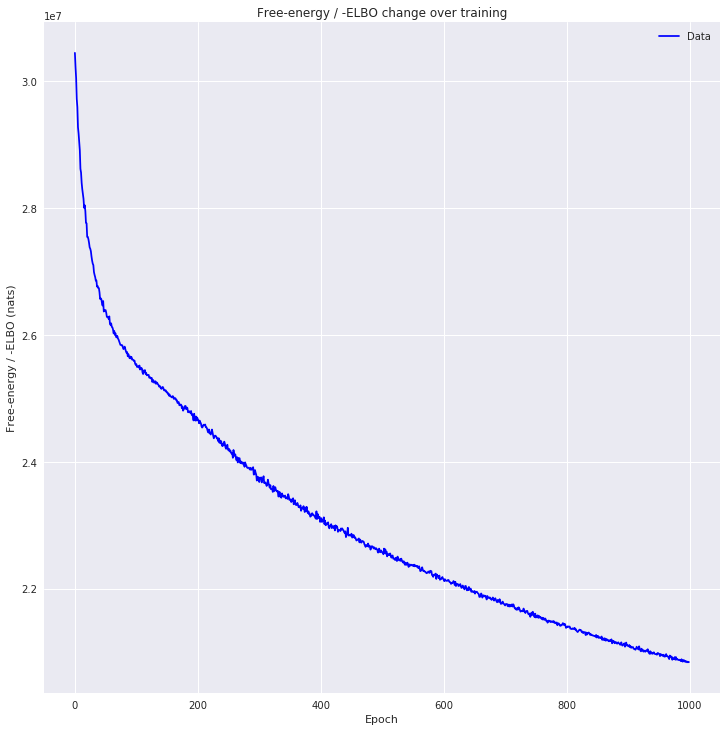

In [9]:
utils.plot_losses(losses)

In [15]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [16]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    else:
        task = task.capitalize()
    return task

In [12]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

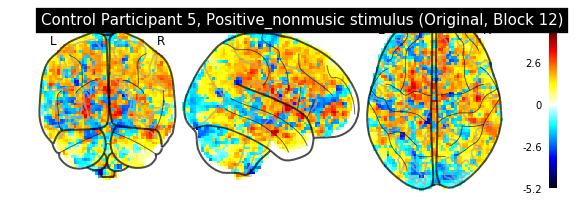

07/31/2019 15:32:58 Reconstruction Error (Frobenius Norm): 6.32288086e+02 out of 8.05481567e+02


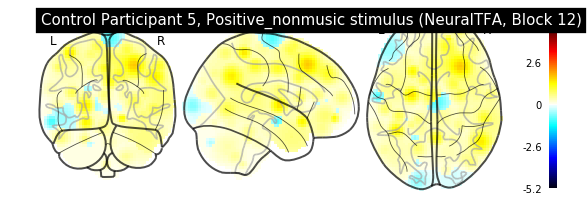

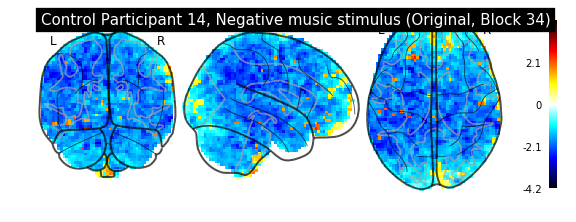

07/31/2019 15:33:01 Reconstruction Error (Frobenius Norm): 5.54643188e+02 out of 8.14314392e+02


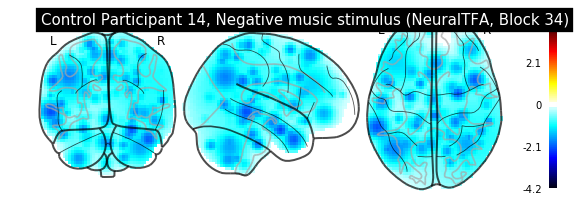

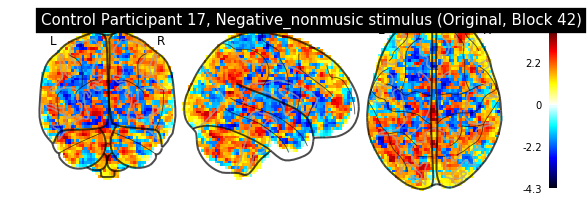

07/31/2019 15:33:05 Reconstruction Error (Frobenius Norm): 6.94493835e+02 out of 7.59354187e+02


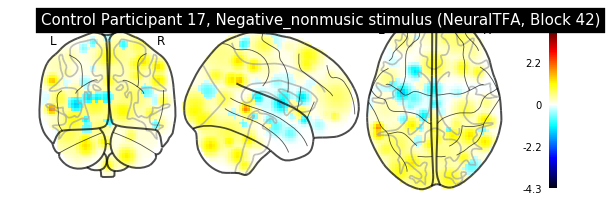

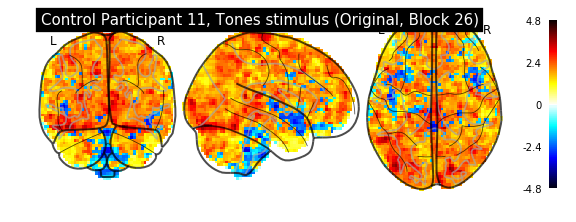

07/31/2019 15:33:08 Reconstruction Error (Frobenius Norm): 6.59074951e+02 out of 8.02610413e+02


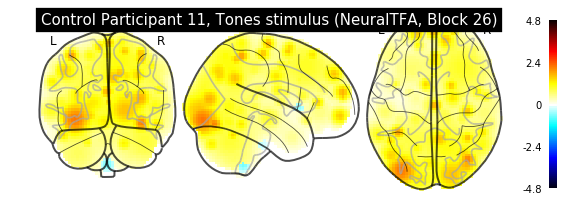

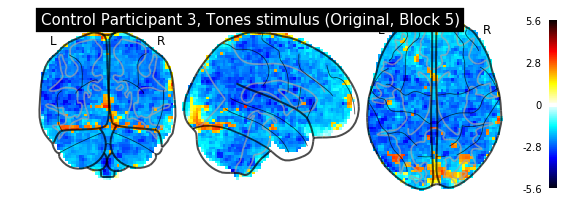

07/31/2019 15:33:11 Reconstruction Error (Frobenius Norm): 7.35327698e+02 out of 1.26810339e+03


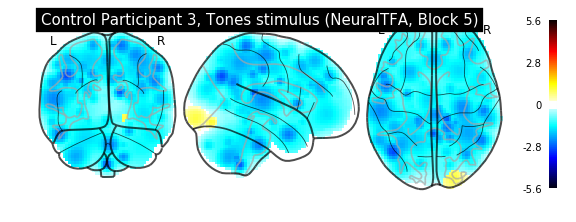

In [13]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


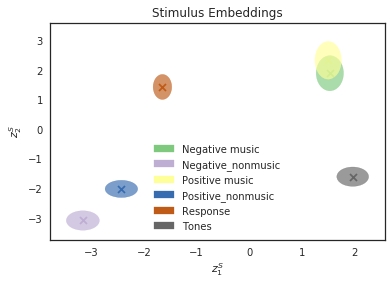

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


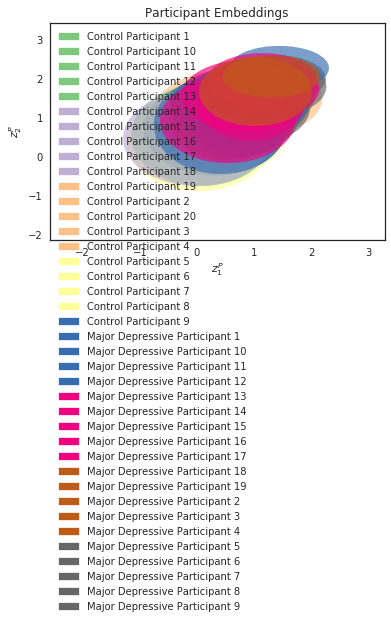

In [18]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

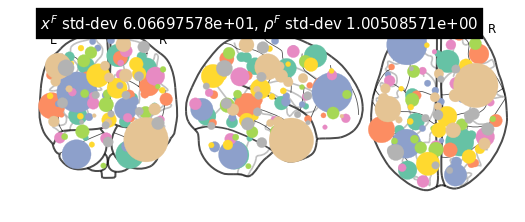

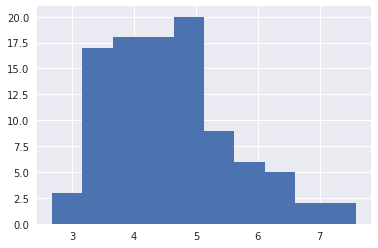

(<nilearn.plotting.displays.OrthoProjector at 0x7fb86d6fd438>,
 tensor([[-3.2141e+01, -8.5761e+01, -6.2632e+00],
         [ 4.8641e+01,  1.8638e+01,  3.9820e+00],
         [-1.7905e-01,  3.6952e+01,  1.4473e+01],
         [-2.3426e+01, -3.4673e+01,  4.6147e+01],
         [ 2.2664e+01, -5.6112e+01, -4.7207e+01],
         [ 3.5084e+01, -4.9072e+01,  5.5807e+01],
         [-2.3924e+01, -4.0462e+01, -2.9777e+01],
         [ 1.0196e+01,  2.8755e+01,  5.6871e+01],
         [-2.7080e+01, -7.0613e+00,  7.4682e+00],
         [ 2.5517e+01, -5.1566e+01,  1.2097e+01],
         [ 1.7494e+01, -5.9065e+01, -1.2745e+01],
         [ 4.0511e+01, -1.6285e+00,  4.4093e+01],
         [-4.0858e+01, -4.3601e+01,  5.5593e+01],
         [ 1.2630e+01, -6.4513e+01,  5.4058e+01],
         [-2.2836e+01, -7.1769e+00,  3.4883e+01],
         [-4.9184e+01,  3.7169e+01, -5.5374e+00],
         [ 2.2033e+01,  5.6374e+01,  1.4971e+01],
         [ 3.8481e+01, -7.8173e+01,  1.6213e+01],
         [ 4.2974e+01,  3.6416e+01,  

In [19]:
dtfa.visualize_factor_embedding()

In [20]:
dtfa.average_reconstruction_error()

07/31/2019 15:45:14 Average reconstruction error (MSE): 7.61149265e-01
07/31/2019 15:45:14 Average data norm (Euclidean): 9.60465657e-01
07/31/2019 15:45:14 Percent average reconstruction error: 0.305904


(0.7611492650035863, 0.9604656573615109, 0.003059044266379001)

In [21]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


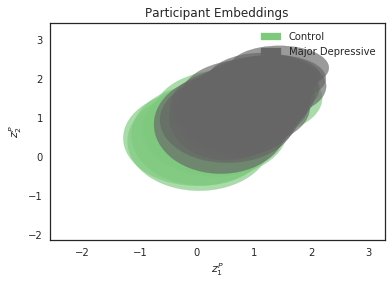

In [22]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)